In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from scipy.constants import c, pi
from opticalmaterialspy.material import SiO2

In [2]:
# from jupyterthemes import jtplot
# jtplot.style(theme = 'grade3', spines = True, context = 'paper', fscale = 2, ticks = False, grid = True, gridlines = '--', figsize = (27, 3))

sns.set(context='talk', style='ticks', palette='dark', font='sans-serif', font_scale=1.3, color_codes=True, rc=None)
path_fig = '/home/marvyn/Dropbox/SBFoton-Presentation/'

<font color = red>Transmission:</font>

$$T(\omega) = 1 + \sum_{i=1}^{N}\frac{4 \eta (\eta-1)\kappa^2}{\kappa^2 + 4(\omega-\omega_0[i])^2}$$

In [3]:
def Transmission(ω, ω0, η, κ):
    T = 1
    for ii in np.arange(len(ω0)):
        T = T + (4*η*(η-1) * np.power(κ, 2)) / (np.power(κ, 2) + 4*np.power(ω-ω0[ii], 2))
    return T

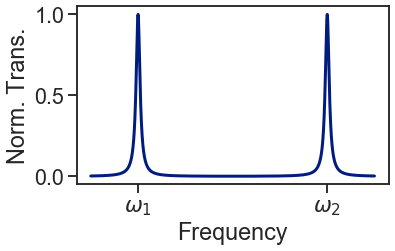

In [9]:
ωi = 0
ωf = 6

Δω = 1e-3
Δω0 = 4
η = 0.5
κ = 0.1

ω = np.arange(ωi, ωf, Δω)
ω0 = np.arange(ωi+1, ωf, Δω0)
labels = [r'$ω_1$', r'$ω_2$']

plt.plot(ω, Transmission(ω,ω0,η,κ), lw=3)
plt.xlabel('Frequency')
plt.ylabel('Norm. Trans.')
plt.xticks(ω0, labels)
plt.yticks(np.arange(0,1.1,0.5))
plt.tight_layout()

# plt.savefig(path_fig+'Frequency-w1-w2.svg')
plt.show()

<font color=red>Eccentricity splitting:</font>

$$\frac{\Delta\omega_\text{ecc}}{\omega_{nlm}} = -\frac{\epsilon}{6}\left(1-3\frac{|m|^2}{l(l+1)}\right)$$

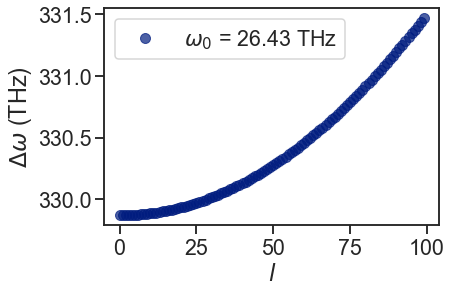

In [5]:
def Splitting(R, ϵ, l):
    FSR = c / (2*pi*SiO2().n(1550)*R)
    ω0 = 1e-12 * l * FSR # in THz
    Δω = []
    for ii in np.arange(l):
        Δω.append(ω0 - ω0 * (ϵ/6) * (1-3*np.power(ii, 2)/(l*(l+1))))
    return Δω

# Example
lex = 100
plt.plot(np.arange(lex), Splitting(10e-6, 0.01, lex), 'o', label = '$ω_0$ = {:3.2f} THz'.format(Splitting(125e-6, 0, lex)[0]), markersize = 10, alpha = 0.7)
plt.xlabel('$l$')
plt.ylabel('$Δω$ (THz)')
plt.legend(loc = 'best')
plt.show()

Tomar em consideração que para variar de (186-205)THz ou (1460-1610)nm temos que usar valores de $l$ que vão de (700-780)

In [6]:
# a = [1,2]
# b = [3,4]
# c = []
# c.append(a+b)
# np.size(c)

In [7]:
def ω_spl(R, ϵ, l):
    ω_spl = []
    for ii in np.arange(len(l)):
        ω_spl.append(Splitting(R, ϵ, l[ii]))
#         Δω = []
#         for jj in np.arange(l[ii]):
#             ω0 = 1e-12 * (c/1610e-9 + l[ii]*FSR) # in MHz
#             Δω.append(ω0 - ω0 * (ϵ/6) * (1-3*np.power(jj/l[ii], 2)))
#         return Δω
#     ω0.append(Δω[ii])
    return ω_spl


R = 125e-6
l = np.arange(5, 10, 1)
ϵ = 0.01

# for ii in np.arange(len(l)):
#     plt.plot(np.arange(len(ω_spl(R, ϵ, l)[ii])), ω_spl(R, ϵ, l)[ii], 'o')
# plt.show()

ω_spl(R, 0.01, l)


# def Transm_Split(ω, ω0, η, κ):
#     T = 1
#     for ii in np.arange(len(ω0)):
#         T = T + (4*η*(η-1) * np.power(κ, 2)) / (np.power(κ, 2) + 4*np.power(ω-ω0[ii], 2))
#     return T

# # Example:
# κ = 2e3 # in MHz
# ω = np.arange(ω0[0]-1e5, ω0[-1]+1e5, 2)
# plt.plot(1e-6*ω, Transm_Split(ω, ω0, 0.5, κ), linewidth = '2')
# plt.xlabel('$ω$ (GHz)')
# plt.ylabel('Normalized Transm.')
# # plt.legend(loc='best')
# plt.show()

[[1.3194778383711874,
  1.3196981184777603,
  1.3203589587974787,
  1.321460359330343,
  1.3230023200763525],
 [1.583373406045425,
  1.5835622175653445,
  1.5841286521251032,
  1.585072709724701,
  1.586394390364138,
  1.588093694043414],
 [1.8472689737196624,
  1.847434183799592,
  1.847929814039381,
  1.848755864439029,
  1.8499123349985362,
  1.8513992257179028,
  1.8532165365971285],
 [2.1111645413938995,
  2.1113113947982813,
  2.111751955011427,
  2.1124862220333367,
  2.11351419586401,
  2.1148358765034465,
  2.1164512639516473,
  2.1183603582086117],
 [2.3750601090681376,
  2.375192277132081,
  2.3755887813239123,
  2.376249621643631,
  2.3771747980912363,
  2.3783643106667296,
  2.37981815937011,
  2.381536344201378,
  2.383518865160534]]

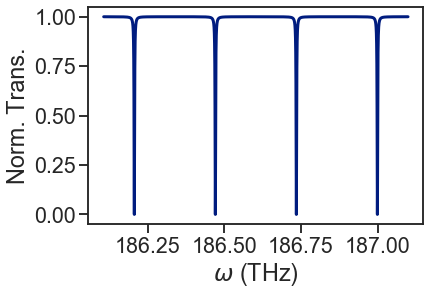

In [8]:
R = 125e-6
FSR = c / (2*pi*SiO2().n(1550)*R)
l = np.arange(4)

ω0 = 1e-6 * (c/1610e-9 + l*FSR) # in MHz

def Transm_Split(ω, ω0, η, κ):
    T = 1
    for ii in np.arange(len(ω0)):
        T = T + (4*η*(η-1) * np.power(κ, 2)) / (np.power(κ, 2) + 4*np.power(ω-ω0[ii], 2))
    return T

# Example:
κ = 2e3 # in MHz
ω = np.arange(ω0[0]-1e5, ω0[-1]+1e5, 2)
plt.plot(1e-6*ω, Transm_Split(ω, ω0, 0.5, κ), linewidth = 3)
plt.xlabel('$ω$ (THz)')
plt.ylabel('Norm. Trans.')
# plt.legend(loc='best')
plt.show()